##Practica 2


In [479]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import seaborn as sns
from scipy.integrate import quad

In [480]:
plt.rcParams.update(
    {
        "grid.color": "gray",
        "grid.linestyle": "--",
        "grid.alpha": 0.7,
        "axes.facecolor": "whitesmoke",
        "axes.labelsize": 12,
        "axes.labelweight": "bold",
        "axes.labelcolor": "navy",
        "axes.titlesize": 14,
        "axes.titleweight": "bold",
        "axes.titlecolor": "navy",
        "xtick.color": "black",
        "ytick.color": "black",
        "legend.fontsize": 10,
        "legend.frameon": False,
        "figure.autolayout": True,
    }
)

### Problema 1 ¿en que negocio conviene comprar?


In [481]:
# Variables
n1, k1 = 10, 10
n2, k2 = 50, 48
n3, k3 = 200, 186

In [482]:
# Pp  prior uniforme en (0,1) sobre los p_i
def Pp(p):
    return 1


# Pk_np
# k_i, el numero de "me gustas" que recibe el negocio i. k_i <= n_i
def Pk_np(k, n, p):
    return st.binom.pmf(k, n, p)

#### 1.1 Interpretacion de Galton Board


- Cada obstaculo representa una decision binomial, gusta o no gusta.
- Cada recipiente representa el numero total de "me gusta" posible
- La cantidad de niveles representa el numero de personas $n_i$ que toman la decision


#### 1.2 Plotear posterior de $p_i$


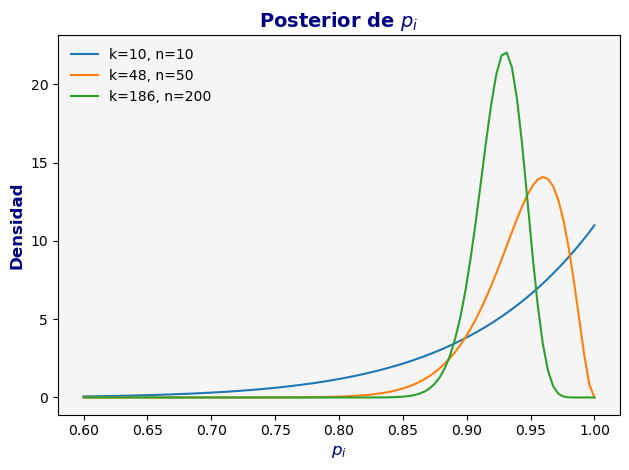

In [483]:
# Posterior de p_i
def Pp_kn(p, k, n):
    return st.beta.pdf(p, k + 1, n - k + 1)


plt.plot(
    np.linspace(0.6, 1, 100),
    Pp_kn(np.linspace(0.6, 1, 100), k1, n1),
    label=f"k={k1}, n={n1}",
)
plt.plot(
    np.linspace(0.6, 1, 100),
    Pp_kn(np.linspace(0.6, 1, 100), k2, n2),
    label=f"k={k2}, n={n2}",
)
plt.plot(
    np.linspace(0.6, 1, 100),
    Pp_kn(np.linspace(0.6, 1, 100), k3, n3),
    label=f"k={k3}, n={n3}",
)

plt.title("Posterior de $p_i$")
plt.xlabel("$p_i$")
plt.ylabel("Densidad")

plt.legend()
plt.tight_layout()

#### 1.3 Intervalos de credibilidad de $p_i$


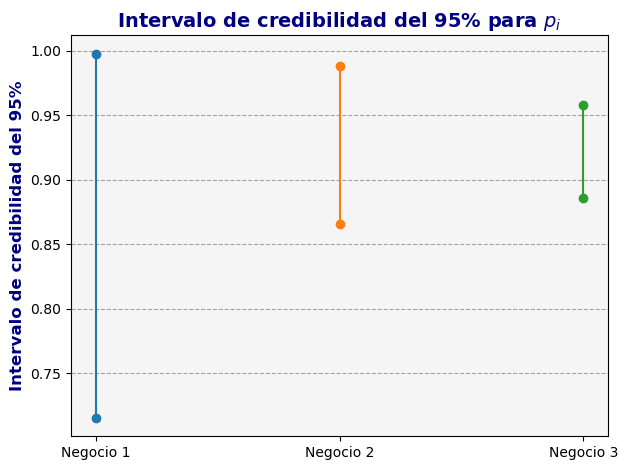

In [484]:
# intervalos de credibilidad del 95%

intervalos = [
    st.beta.interval(0.95, k1 + 1, n1 - k1 + 1),
    st.beta.interval(0.95, k2 + 1, n2 - k2 + 1),
    st.beta.interval(0.95, k3 + 1, n3 - k3 + 1),
]

labels = ["Negocio 1", "Negocio 2", "Negocio 3"]
x = np.arange(len(labels))

plt.figure()
for i, (low, high) in enumerate(intervalos):
    plt.plot([i, i], [low, high], marker="o")

plt.xticks(x, labels)
plt.ylabel("Intervalo de credibilidad del 95%")
plt.title("Intervalo de credibilidad del 95% para $p_i$")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#### 1.4 Elegir donde comprar.


- ¿que forma tiene la expresion final? la del valor esperado para P dados los datos


In [485]:
from scipy.integrate import quad

# Calcular la distribucion de probabilidad marginal de nuestra experiencia dado los datos,
# integrando todos los valores de p.

prob_marginal_m = []
for k, n in [(k1, n1), (k2, n2), (k3, n3)]:
    integral, _ = quad(lambda p: p * Pp_kn(p, k, n), 0, 1)
    prob_marginal_m.append(integral)

for i, p in enumerate(prob_marginal_m):
    print(f"Probabilidad marginal de m=1 para el negocio {i+1}: {p:.3f}")

Probabilidad marginal de m=1 para el negocio 1: 0.917
Probabilidad marginal de m=1 para el negocio 2: 0.942
Probabilidad marginal de m=1 para el negocio 3: 0.926


### Problema 2 - Arqueras Mexicanas


Variables:

- $x$ = posicion del arco
- $y_i$ = posicion de la flecha
- $\beta$ = desvio standard de la posicion de la flecha
- $\sigma$ = desvio standard de la posicion del arco
- $\mu$ = posicion promedio del arco

Posicion de la flecha: $$P(y_i|x) = N(y_i|x,\beta^2)$$

Prior sobre la posicion del arco: $$P(x) = N(x|\mu,\sigma^2)$$


#### 2.1 Prediccion sobre la posicion de la primera flecha


##### Aproximacion numerica


In [486]:
# Prior sobre x
def Px(x):
    mu = 0
    sigma = 1.5
    return st.norm.pdf(x, mu, sigma)


# supongo que beta = 1
def Py_x(y, x):
    return st.norm.pdf(y, x, 1)


def aproximacion_Py(range):
    matrix = np.zeros((len(range), len(range)))

    for i, x in enumerate(range):
        for j, y in enumerate(range):
            matrix[i, j] = Py_x(y, x) * Px(x)

    return matrix

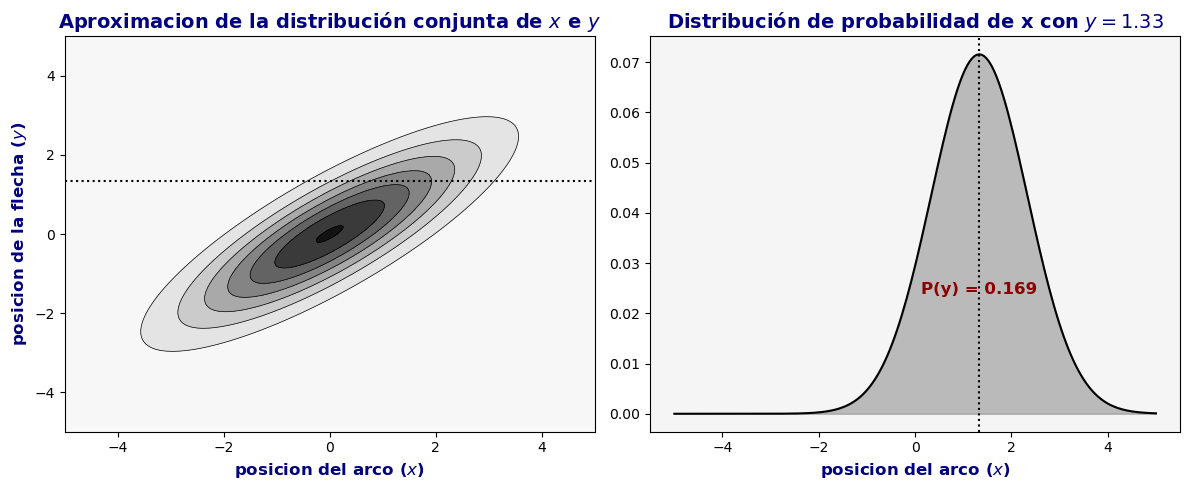

In [487]:
plot_range = np.linspace(-5, 5, 200)
Z = aproximacion_Py(plot_range)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

### Distribucion conjunta aproximada

contour_filled = ax[0].contourf(plot_range, plot_range, Z, levels=7, cmap="Greys")
contour_lines = ax[0].contour(
    plot_range, plot_range, Z, levels=7, colors="black", linewidths=0.5
)

ax[0].set_xlabel(
    "posicion del arco ($x$)", fontsize=12, fontweight="bold", color="navy"
)
ax[0].set_ylabel(
    "posicion de la flecha ($y$)", fontsize=12, fontweight="bold", color="navy"
)
ax[0].set_title(
    "Aproximacion de la distribución conjunta de $x$ e $y$",
    fontsize=14,
    fontweight="bold",
    color="navy",
)

# Integro sobre x para la posicion de y = y_val
y_val = 1.33
index_y_val = np.abs(plot_range - y_val).argmin()

ax[0].axhline(y=y_val, color="black", linestyle="dotted")


### Distribucion de probabilidad a priori de Y.

Z_at_y_val = Z[index_y_val, :]

ax[1].plot(plot_range, Z_at_y_val, color="black")
ax[1].fill_between(plot_range, Z_at_y_val, color="grey", alpha=0.5)

ax[1].set_xlabel(
    "posicion del arco ($x$)", fontsize=12, fontweight="bold", color="navy"
)

ax[1].set_title(
    f"Distribución de probabilidad de x con $y={y_val}$",
    fontsize=14,
    fontweight="bold",
    color="navy",
)

# integrar area bajo al curva
integral, _ = quad(lambda x: Py_x(y_val, x) * Px(x), -5, 5)


ax[1].text(
    y_val,
    max(Z_at_y_val) / 3,
    f"P(y) = {integral:.3f}",
    fontsize=12,
    fontweight="bold",
    color="darkred",
    ha="center",
)

ax[1].axvline(x=y_val, color="black", linestyle="dotted")


ax[0].grid(False)
ax[1].grid(False)
ax[0].set_facecolor("whitesmoke")
ax[1].set_facecolor("whitesmoke")
plt.tight_layout()

##### Solucion exacta


In [488]:
def Py(y):
    mu = 0
    sigma = 1.5
    beta = 1

    return st.norm.pdf(y, mu, np.sqrt(sigma**2 + beta**2))


print(f"Py(Y={y_val}) aproximada = {integral:.3f}")
print(f"Py(Y={y_val}) exacta = {Py(y_val):.3f}")

Py(Y=1.33) aproximada = 0.169
Py(Y=1.33) exacta = 0.169


#### 2.2 Posterior sobre la posicion del arco


Text(0.5, 1.0, 'Simulacion de los datos')

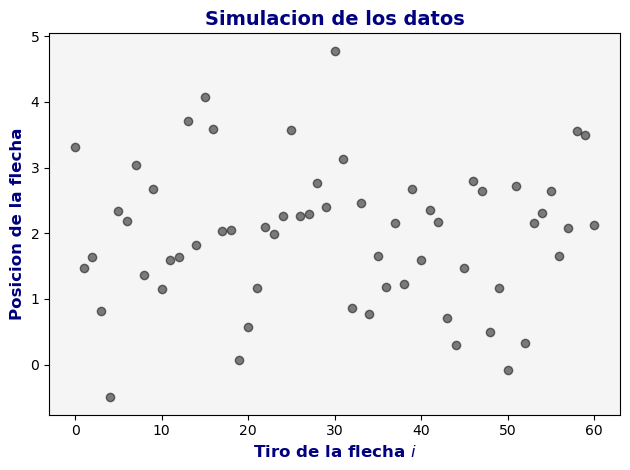

In [489]:
### Simulacion de los datos

# parametros para x: mu=2, sigma=0.6
# parametros para y: asumo que beta = 1

np.random.seed(222)

posiciones_arco = st.norm.rvs(loc=2, scale=0.6, size=61)
posiciones_flecha = st.norm(loc=posiciones_arco, scale=1).rvs()


plt.plot(posiciones_flecha, "o", color="black", alpha=0.5)
plt.xlabel("Tiro de la flecha $i$")
plt.ylabel("Posicion de la flecha")
plt.title("Simulacion de los datos")

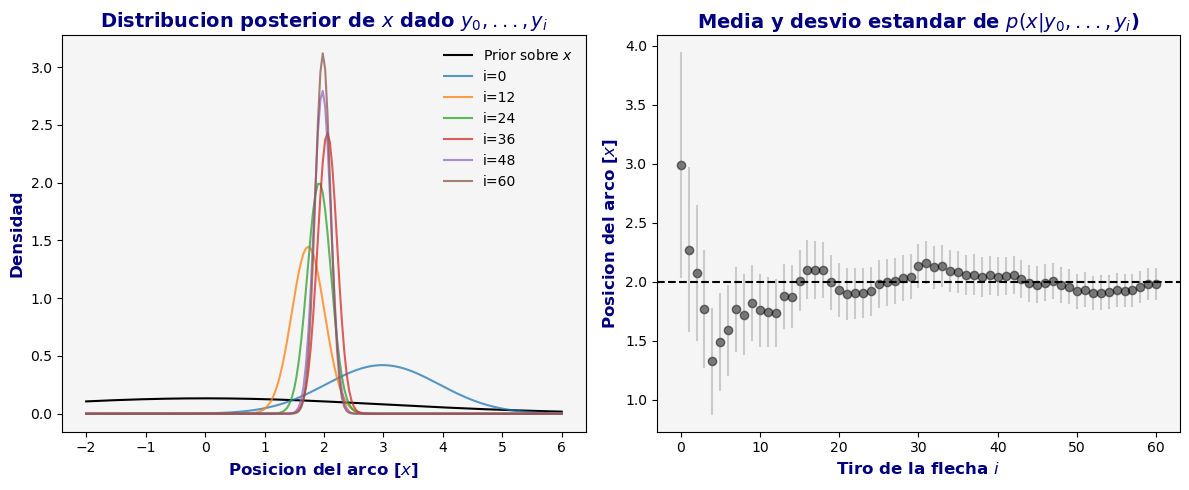

In [490]:
# Los parametros por default para mu y sigma definen el prior sobre x.
# Elijo  mu=0 y sigma=3 como priors, poco informativo con media en 0.
# reales de la distribucion de x con la que se generaron los datos.


def Px_y(y, mu=0, sigma=3, beta=1):
    # regresa los parametros de la normal posterior para x dado y.
    mu_posterior = (y * (sigma**2) + mu * (beta**2)) / (sigma**2 + beta**2)

    sigma_posterior = np.sqrt((sigma**2) * (beta**2) / (sigma**2 + beta**2))

    return mu_posterior, sigma_posterior


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
x_range = np.linspace(-2, 6, 200)

# ploteo prior sobre x
axs[0].plot(
    x_range,
    st.norm.pdf(x_range, loc=0, scale=3),
    label="Prior sobre $x$",
    color="black",
)

for i, yi in enumerate(posiciones_flecha):

    # Para el primer dato uso los valores a priori de mu y sigma.
    if i == 0:
        mu_posterior, sigma_posterior = Px_y(yi)
    else:
        mu_posterior, sigma_posterior = Px_y(yi, mu_posterior, sigma_posterior)

    # Plotear la distribucion posterior dado y_i
    if i % 12 == 0:
        axs[0].plot(
            x_range,
            st.norm.pdf(x_range, mu_posterior, sigma_posterior),
            label=f"i={i}",
            alpha=0.75,
        )

    # Plotear la media de la distribucion y un desvio standard
    axs[1].plot(i, mu_posterior, "o", color="black", alpha=0.5)
    axs[1].plot(
        [i, i],
        [mu_posterior - sigma_posterior, mu_posterior + sigma_posterior],
        color="dimgray",
        alpha=0.3,
    )

# linea horizonal sobre la verdadera media de los datos
axs[1].axhline(y=2, color="black", linestyle="--")

axs[0].legend()
axs[0].set_xlabel("Posicion del arco [$x$]")
axs[0].set_ylabel("Densidad")
axs[0].set_title("Distribucion posterior de $x$ dado ${y_0, ..., y_i}$")

axs[1].set_ylabel("Posicion del arco [$x$]")
axs[1].set_xlabel("Tiro de la flecha $i$")
axs[1].set_title("Media y desvio estandar de $p(x|{y_0, ..., y_i}$)")

plt.tight_layout()

#### 2.3 Prediccion sobre la posicion de la proxima flecha


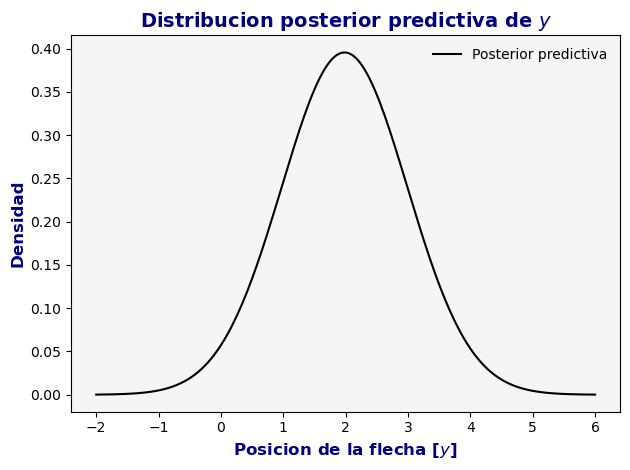

In [491]:
# Distribucion posterior predictiva sobre yi+1


def posterior_x(x):
    return st.norm.pdf(x, mu_posterior, sigma_posterior)


def posterior_predictiva_y(y):
    x_range = np.linspace(-6, 6, 100)
    integral, _ = quad(lambda x: Py_x(y, x) * posterior_x(x), -6, 6)
    return integral


plt.plot(
    x_range,
    [posterior_predictiva_y(y) for y in x_range],
    label="Posterior predictiva",
    color="black",
)

plt.xlabel("Posicion de la flecha [$y$]")
plt.ylabel("Densidad")
plt.title("Distribucion posterior predictiva de $y$")
plt.legend()
plt.tight_layout()

### Problema 3 - Modelos Polinomiales de complejidad creciente


#### 3.1 Generar 20 datos alrededor de una per ́ıodo de una sinoidal


Text(0.5, 1.0, 'Datos simulados')

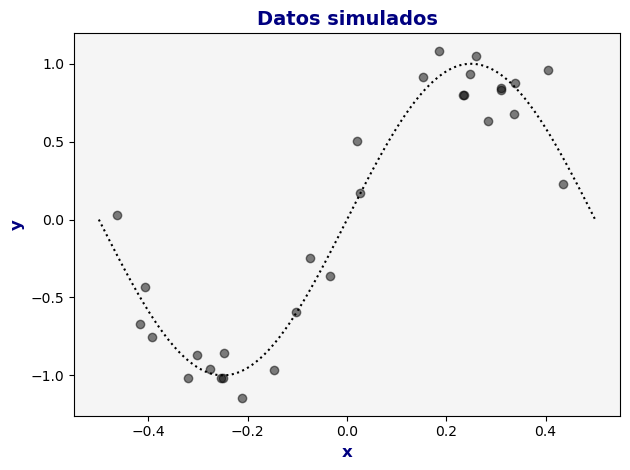

In [492]:
### Subyacente es una funcion sinoidal en el range [-1/2 , 1/2]
np.random.seed(222)

n = 30  # numero de observaciones
beta = 0.2  # ruido de y

x = st.uniform.rvs(-0.5, 1, n)
x_range = np.linspace(-0.5, 0.5, 100)
f = lambda x: np.sin(2 * np.pi * x)

plt.plot(
    x_range,
    f(x_range),
    color="black",
    label="funcion subyacente",
    linestyle="dotted",
)

y = st.norm.rvs(loc=f(x), scale=beta, size=n)

plt.plot(x, y, "o", color="black", alpha=0.5, label="datos")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Datos simulados")

#### 3.2 Graficar el valor de maxima verosimilitud obtenido por los modelos de grado 0 a 9.


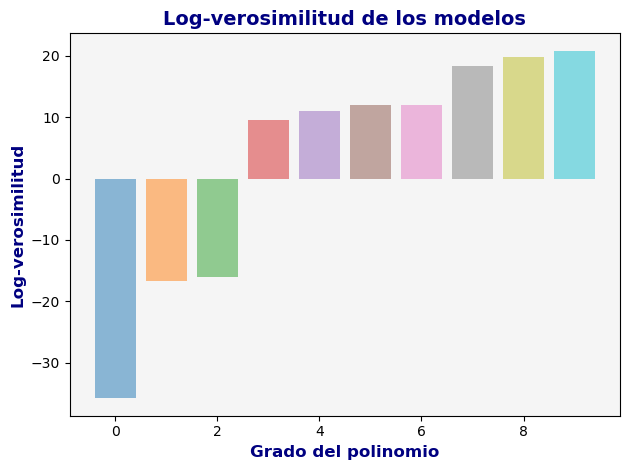

In [493]:
from statsmodels.api import OLS

np.random.seed(222)


def transformacion_polinomica(x, grado):
    return np.array([x**i for i in range(grado + 1)]).T


fig, ax = plt.subplots()


for grado in range(10):
    modelo = OLS(y, transformacion_polinomica(x, grado)).fit()
    ax.bar(grado, modelo.llf, label=f"grado {grado}", alpha=0.5)

ax.set_xlabel("Grado del polinomio")
ax.set_ylabel("Log-verosimilitud")
ax.set_title("Log-verosimilitud de los modelos")
plt.tight_layout()

#### 3.3 Graficar las curvas obtenidas con cada modelo mediante m ́axima verosimilitud.


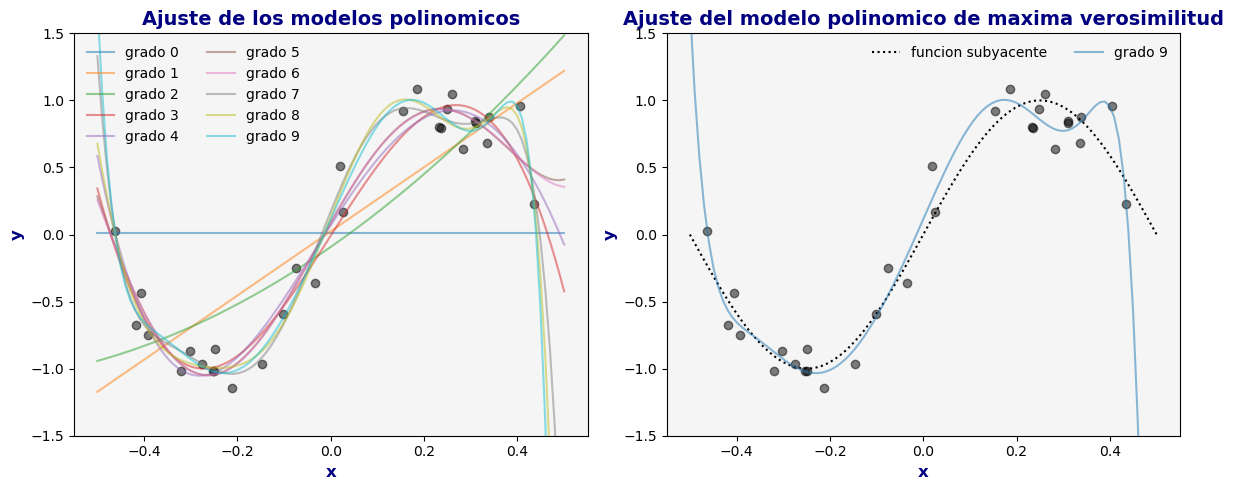

In [494]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# plot data
ax[0].plot(x, y, "o", color="black", alpha=0.5)
ax[0].set_ylim(-1.5, 1.5)

ax[1].plot(
    x_range, f(x_range), color="black", label="funcion subyacente", linestyle="dotted"
)
ax[1].plot(x, y, "o", color="black", alpha=0.5)
ax[1].set_ylim(-1.5, 1.5)


for grado in range(10):
    modelo = OLS(y, transformacion_polinomica(x, grado)).fit()

    # plot curves
    y_hat = modelo.predict(transformacion_polinomica(x_range, grado))
    ax[0].plot(x_range, y_hat, label=f"grado {grado}", alpha=0.5)

    if grado == 9:
        ax[1].plot(x_range, y_hat, label=f"grado {grado}", alpha=0.5)


ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Ajuste de los modelos polinomicos")
ax[0].legend(ncols=2)

ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Ajuste del modelo polinomico de maxima verosimilitud")
ax[1].legend(ncols=2)

plt.tight_layout()

#### 3.4 Evaluacion de la prediccion "en linea" que hacen los modelos ajustados por maxima verosimilitud


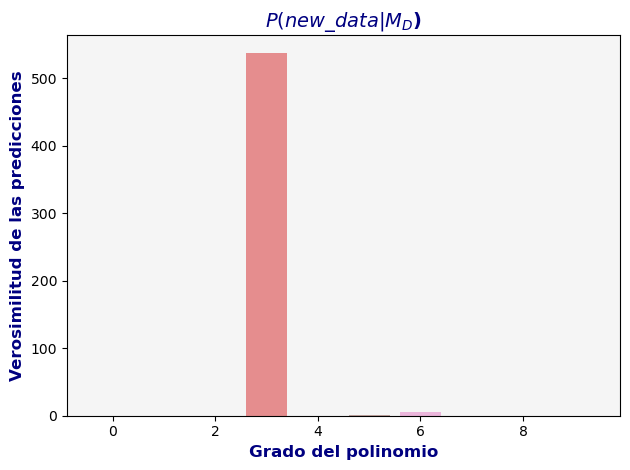

In [495]:
np.random.seed(22)

k = 100
x_out_of_sample = st.uniform.rvs(-0.5, 1, k)
y_out_of_sample = st.norm.rvs(loc=f(x_out_of_sample), scale=beta, size=k)

fig, ax = plt.subplots()

for grado in range(10):
    modelo = OLS(y, transformacion_polinomica(x, grado)).fit()
    y_hat = modelo.predict(transformacion_polinomica(x_out_of_sample, grado))

    likelihood_y_hat = np.prod(st.norm.pdf(y_out_of_sample, loc=y_hat, scale=beta))
    ax.bar(grado, likelihood_y_hat, label=f"grado {grado}", alpha=0.5)

ax.set_xlabel("Grado del polinomio")
ax.set_ylabel("Verosimilitud de las predicciones")
ax.set_title("$P(new\_data|M_D$)")
plt.tight_layout()

#### 3.5. Mas criterios arbitrarios de seleccion de hipotesis: los regularizadores


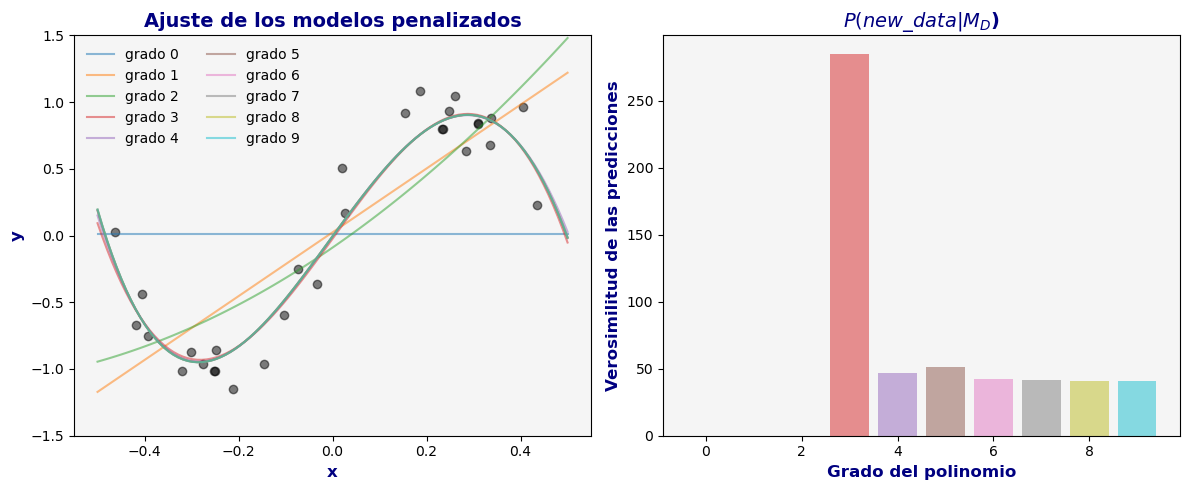

In [496]:
from ModeloLineal import moments_posterior

np.random.seed(22)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# plot data
ax[0].plot(x, y, "o", color="black", alpha=0.5)
ax[0].set_ylim(-1.5, 1.5)


for grade in range(10):
    means, cov = moments_posterior(
        1 / (25) ** 2, 1, y, transformacion_polinomica(x, grade)
    )

    # plot curve
    y_curve = transformacion_polinomica(x_range, grade) @ means
    ax[0].plot(x_range, y_curve, label=f"grado {grade}", alpha=0.5)

    # predicciones
    y_hat = transformacion_polinomica(x_out_of_sample, grade) @ means
    likelihood_y_hat = np.prod(st.norm.pdf(y_out_of_sample, loc=y_hat, scale=beta))
    ax[1].bar(grade, likelihood_y_hat, label=f"grado {grade}", alpha=0.5)

ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Ajuste de los modelos penalizados")
ax[0].legend(ncols=2)

ax[1].set_xlabel("Grado del polinomio")
ax[1].set_ylabel("Verosimilitud de las predicciones")
ax[1].set_title("$P(new\_data|M_D$)")

plt.tight_layout()

#### 3.6 El balance natural de las reglas de la probabilidad


Text(0, 0.5, 'Probabilidad')

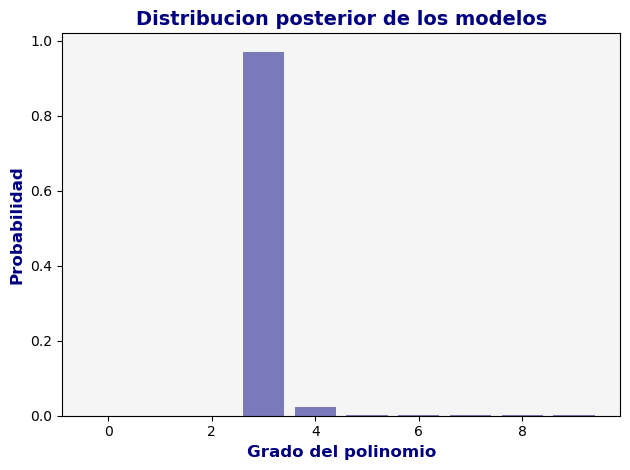

In [497]:
from ModeloLineal import log_evidence

np.random.seed(22)

fig, ax = plt.subplots()

model_log_evidence = [
    log_evidence(y, transformacion_polinomica(x, grado), 1e-6, 10)
    for grado in range(10)
]
model_prior = [1 / 10] * 10
model_posterior = model_prior * np.exp(model_log_evidence)
model_posterior /= np.sum(model_posterior)

ax.bar(range(10), model_posterior, color="navy", label="Posterior", alpha=0.5)
ax.set_title("Distribucion posterior de los modelos")
ax.set_xlabel("Grado del polinomio")
ax.set_ylabel("Probabilidad")

#### 3.7 Como se explica el balance natural de las reglas de la probabilidad


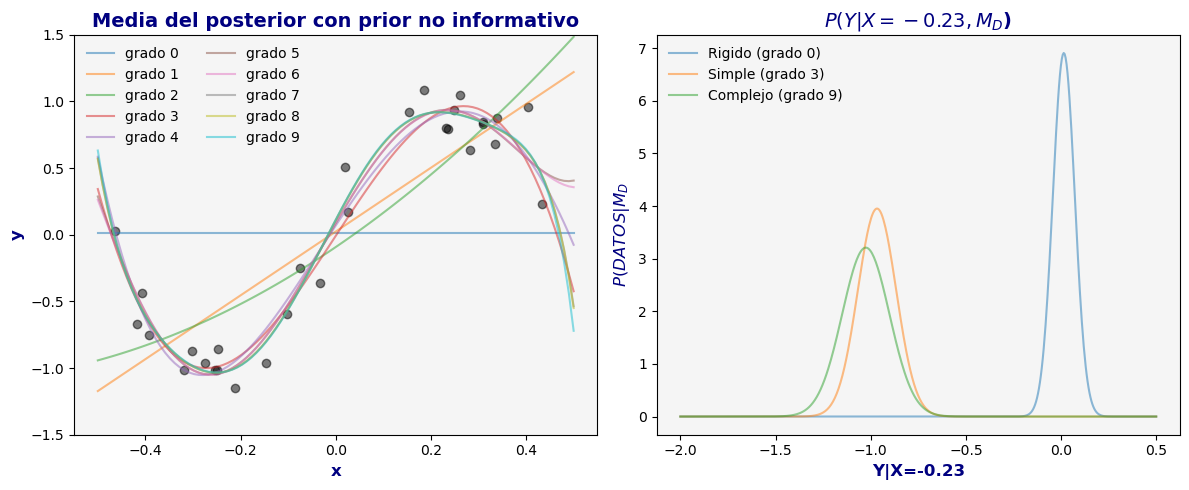

In [498]:
from ModeloLineal import moments_posterior

np.random.seed(22)

x_test = -0.23

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# plot data
ax[0].plot(x, y, "o", color="black", alpha=0.5)
ax[0].set_ylim(-1.5, 1.5)


_legend = ["Rigido", "Simple", "Complejo"]

for grade in range(10):
    means, cov = moments_posterior(1e-6, 10, y, transformacion_polinomica(x, grade))

    # plot curve
    y_curve = transformacion_polinomica(x_range, grade) @ means
    ax[0].plot(x_range, y_curve, label=f"grado {grade}", alpha=0.5)

    # Plot distribution of the posterior at x = x_test

    if grade in [0, 3, 9]:
        y_test_mean = transformacion_polinomica(x_test, grade) @ means
        y_test_var = (
            transformacion_polinomica(x_test, grade)
            @ cov
            @ transformacion_polinomica(x_test, grade).T
        )
        y_test_sd = np.sqrt(y_test_var)

        y_test_range = np.linspace(-2, 0.5, 500)

        y_test_dist = st.norm.pdf(y_test_range, loc=y_test_mean, scale=y_test_sd)

        ax[1].plot(
            y_test_range,
            y_test_dist,
            label=f"{_legend.pop(0)} (grado {grade})",
            alpha=0.5,
        )


ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Media del posterior con prior no informativo")
ax[0].legend(ncols=2)

ax[1].set_xlabel(f"Y|X={x_test}")
ax[1].set_ylabel("$P(DATOS|M_D$")
ax[1].set_title(f"$P(Y|X={x_test},M_D$)")
ax[1].legend()

plt.tight_layout()

### 4. Efecto causal del sexo biologico sobre la altura


#### 4.1 Abrir el archivo alturas.csv y visualizar los datos


In [499]:
data = pd.read_csv(r"datos/alturas.csv")
data.head()

,id,altura,sexo,contextura_madre,altura_madre
0,1,172.7,M,mediana,159.8
1,2,171.5,M,mediana,160.3
2,3,162.6,F,mediana,160.5
3,4,174.1,M,mediana,159.8
4,5,168.3,M,mediana,158.3


<Axes: xlabel='altura_madre', ylabel='altura'>

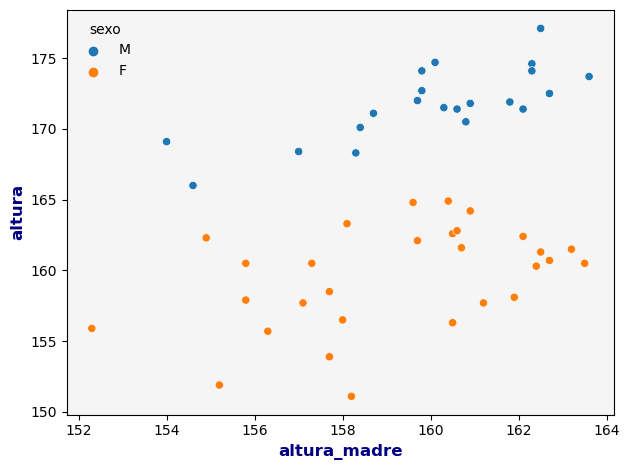

In [500]:
sns.scatterplot(data=data, x="altura_madre", y="altura", hue="sexo")

#### 4.2 Definir los 3 modelos causales alternativos


- modelo base:
  $$altura = h_0 + h_1 . altura\_madre$$

- modelo biologico:
  $$altura = h_0 + h_1 . altura\_madre + h_2 . I(sexo = F) $$

- modelo grupos al azar:
  $$altura = h_0 . altura\_madre + h_{1+(ID mod (max(ID)/2))} $$


#### 4.3 Computar la evidencia de los modelos causales alternativos


In [501]:
np.random.seed(22)

y = data["altura"]

# matriz de diseño modelo base
X0 = np.array([np.ones(len(y)), data["altura_madre"]]).T

# matriz de diseño modelo biologico
X1 = np.array(
    [np.ones(len(y)), data["altura_madre"], (data["sexo"] == "M").astype(int)]
).T

# matriz de diseño modelo de grupos al azar
N = len(y)

grupos = np.zeros((N, N // 2))
indices = np.random.permutation(N)

for i, idx in enumerate(indices):
    grupos[idx, i // 2] = 1

X2 = np.hstack([data["altura_madre"].values.reshape(-1, 1), grupos])

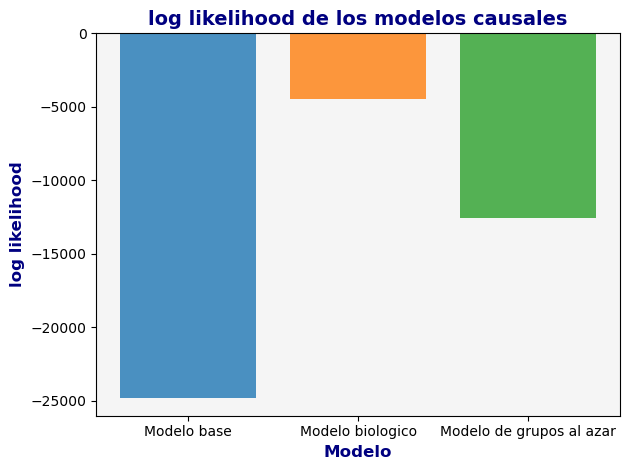

In [502]:
fig, ax = plt.subplots()

_legend = ["Modelo base", "Modelo biologico", "Modelo de grupos al azar"]
ax.set_xlabel("Modelo")
ax.set_xticks(range(len(_legend)))
ax.set_xticklabels(_legend)
ax.set_ylabel("log likelihood")
ax.set_title("log likelihood de los modelos causales")

log_evidence_mj = []
for i, X in enumerate([X0, X1, X2]):
    # alpha "chico" -> prior poco informatico
    # beta "grande" -> ruido en el observable bajo.
    log_evidence_i = log_evidence(y, X, 1e-6, 25)
    log_evidence_mj.append(log_evidence_i)
    ax.bar(i, log_evidence_i, label=_legend[i], alpha=0.8)

#### 4.4. Computar la media geometrica de los modelos causales alternativos


In [508]:
# GeoMean_M  = ( P(D∣M) ) ** 1/N = exp( log_evidence / N )

for i, ll in enumerate(log_evidence_mj):
    geomean = np.exp(ll / len(y))
    print(f"{_legend[i]} - Media Geometrica: {geomean:.2e}")

Modelo base - Media Geometrica: 4.90e-216
Modelo biologico - Media Geometrica: 9.77e-40
Modelo de grupos al azar - Media Geometrica: 7.91e-110


#### 4.5. Computar el posterio de los modelos causales alternativos


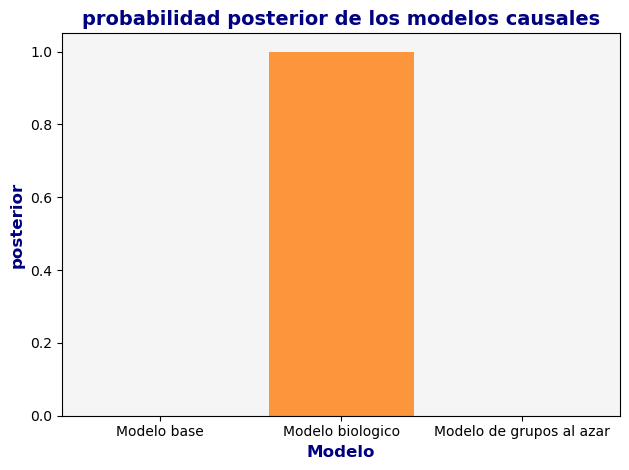

In [522]:
log_prior_m = np.log(np.array([1 / 3] * 3))

log_posterior_m = log_prior_m + np.array(log_evidence_mj)
log_posterior_m -= np.logaddexp.reduce(log_posterior_m)


fig, ax = plt.subplots()
ax.set_xlabel("Modelo")
ax.set_xticks(range(len(_legend)))
ax.set_xticklabels(_legend)
ax.set_ylabel("posterior")
ax.set_title("probabilidad posterior de los modelos causales")

for i, lp in enumerate(log_posterior_m):
    ax.bar(_legend[i], np.exp(lp), label=_legend[i], alpha=0.8)